<a href="https://colab.research.google.com/github/Ge0f3/tensorflow_certification/blob/main/TF_with_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get the data 

In [ ]:
import zipfile

! wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

--2022-08-22 16:43:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  81.9MB/s    in 1.3s    

2022-08-22 16:43:45 (81.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
! ls

pizza_steak.zip  sample_data


In [ ]:
# unzip the files

zip_ref = zipfile.ZipFile('pizza_steak.zip','r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files[:4]:
            print('{}{}'.format(subindent, f))

In [ ]:
print("Example of the file structure")
list_files('pizza_steak')


Example of the file structure
pizza_steak/
    test/
        pizza/
            376625.jpg
            3497151.jpg
            2542065.jpg
            1152100.jpg
        steak/
            1118585.jpg
            1515274.jpg
            2685931.jpg
            3088325.jpg
    train/
        pizza/
            3478964.jpg
            2078208.jpg
            918506.jpg
            2827938.jpg
        steak/
            2374582.jpg
            1849542.jpg
            2938012.jpg
            3869679.jpg


In [ ]:
os.listdir('pizza_steak/train')

['pizza', 'steak']

In [ ]:
print(f"Number of steak images {len(os.listdir('pizza_steak/train/steak'))}")
print(f"Number of Pizza images {len(os.listdir('pizza_steak/train/pizza'))}")

Number of steak images 750
Number of Pizza images 750


In [ ]:
# Get tha className 

import pathlib 

import numpy as np 

data_dir = pathlib.Path('pizza_steak/train')

class_name = np.array(sorted([item.name for item in data_dir.glob('*')]))

class_name

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# let's Visualize our image 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random 

def view_random_image(target_dir,target_class):

  #Setup the target direcotroy 
  target_folder = target_dir+target_class

  #Get a random image path 
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  #Read the image and plot it 

  img = mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f"Image shape : {img.shape} ")

['898119.jpg']
Image shape : (383, 512, 3) 


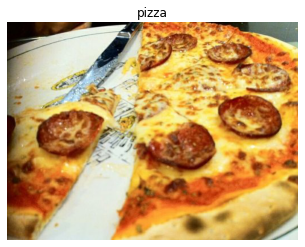

In [ ]:
img = view_random_image(target_dir ='pizza_steak/train/',target_class ='pizza')